In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset
data = pd.read_csv('C:/Users/aryan/Downloads/Titanic-Dataset.csv')

# Display the first few rows
print(data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Display cleaned data
print(data.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


C:\Users\aryan\AppData\Local\Temp\ipykernel_13992\1593411461.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_13992\1593411461.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [4]:
# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


Accuracy: 0.8212290502793296


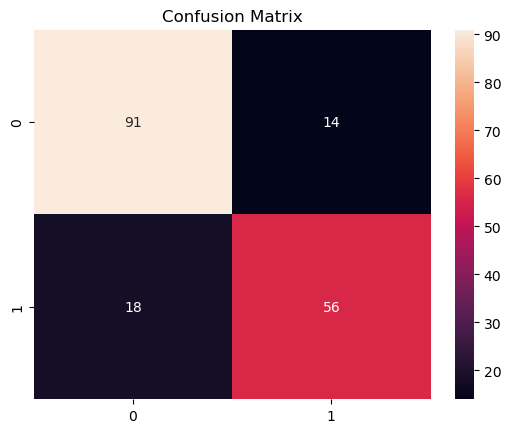

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [6]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [7]:
# Example input: [Pclass, Age, SibSp, Parch, Fare, Sex_male, Embarked_Q, Embarked_S]
new_passenger = np.array([[3, 22, 1, 0, 7.25, 1, 0, 1]])  # Example data
prediction = model.predict(new_passenger)

# Output
if prediction[0] == 1:
    print("The passenger is likely to survive.")
else:
    print("The passenger is unlikely to survive.")


The passenger is unlikely to survive.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tkinter as tk
from tkinter import messagebox

# Load and preprocess data
data = pd.read_csv('C:/Users/aryan/Downloads/Titanic-Dataset.csv')
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# GUI Functionality
def predict_survival():
    try:
        # Get input values from the user
        pclass = int(entry_pclass.get())
        age = float(entry_age.get())
        sibsp = int(entry_sibsp.get())
        parch = int(entry_parch.get())
        fare = float(entry_fare.get())
        sex_male = 1 if gender_var.get() == "Male" else 0
        embarked_q = 1 if embark_var.get() == "Q" else 0
        embarked_s = 1 if embark_var.get() == "S" else 0

        # Create input array
        input_data = np.array([[pclass, age, sibsp, parch, fare, sex_male, embarked_q, embarked_s]])
        
        # Make prediction
        prediction = model.predict(input_data)

        # Show result
        if prediction[0] == 1:
            messagebox.showinfo("Result", "The passenger is likely to survive.")
        else:
            messagebox.showinfo("Result", "The passenger is unlikely to survive.")
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

# Create the GUI
root = tk.Tk()
root.title("Titanic Survival Predictor")

# Labels and Entry Widgets
tk.Label(root, text="Passenger Class (1/2/3):").grid(row=0, column=0, padx=10, pady=5)
entry_pclass = tk.Entry(root)
entry_pclass.grid(row=0, column=1, padx=10, pady=5)

tk.Label(root, text="Age:").grid(row=1, column=0, padx=10, pady=5)
entry_age = tk.Entry(root)
entry_age.grid(row=1, column=1, padx=10, pady=5)

tk.Label(root, text="Siblings/Spouses Aboard:").grid(row=2, column=0, padx=10, pady=5)
entry_sibsp = tk.Entry(root)
entry_sibsp.grid(row=2, column=1, padx=10, pady=5)

tk.Label(root, text="Parents/Children Aboard:").grid(row=3, column=0, padx=10, pady=5)
entry_parch = tk.Entry(root)
entry_parch.grid(row=3, column=1, padx=10, pady=5)

tk.Label(root, text="Fare:").grid(row=4, column=0, padx=10, pady=5)
entry_fare = tk.Entry(root)
entry_fare.grid(row=4, column=1, padx=10, pady=5)

tk.Label(root, text="Gender:").grid(row=5, column=0, padx=10, pady=5)
gender_var = tk.StringVar(value="Male")
tk.Radiobutton(root, text="Male", variable=gender_var, value="Male").grid(row=5, column=1)
tk.Radiobutton(root, text="Female", variable=gender_var, value="Female").grid(row=5, column=2)

tk.Label(root, text="Embarked:").grid(row=6, column=0, padx=10, pady=5)
embark_var = tk.StringVar(value="S")
tk.Radiobutton(root, text="C", variable=embark_var, value="C").grid(row=6, column=1)
tk.Radiobutton(root, text="Q", variable=embark_var, value="Q").grid(row=6, column=2)
tk.Radiobutton(root, text="S", variable=embark_var, value="S").grid(row=6, column=3)

# Predict Button
tk.Button(root, text="Predict Survival", command=predict_survival).grid(row=7, column=0, columnspan=4, pady=10)

# Run the GUI
root.mainloop()


C:\Users\aryan\AppData\Local\Temp\ipykernel_13992\4040695948.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_13992\4040695948.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.
